In [1]:
using PyPlot

# Aufgabe 3
### Teil a

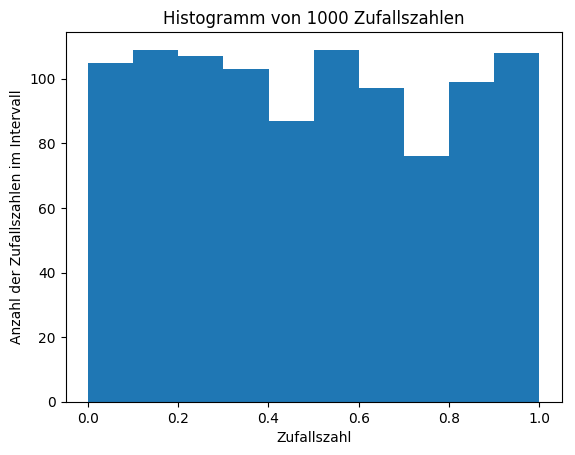

In [2]:
M = 10
N = 1000
PyPlot.plt[:hist](rand(N), M)
title("Histogramm von $N Zufallszahlen")
xlabel("Zufallszahl")
ylabel("Anzahl der Zufallszahlen im Intervall")
show()

### Teil b

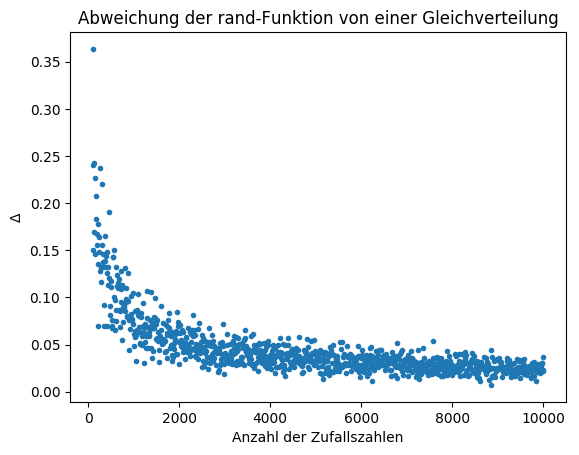

In [3]:
n = 1000
m = 10
Delta = zeros(n)
N = Int.(round.(linspace(1e2, 1e4, n)))
for i in 1:n
    r = rand(N[i])
    for j in 0:m-1
        P_j = sum(j/m .< r .<= (j+1)/m)
        Delta[i] += abs(P_j/N[i]-1/m)
    end
end
plot(N, Delta, ".")
title("Abweichung der rand-Funktion von einer Gleichverteilung")
xlabel("Anzahl der Zufallszahlen")
ylabel("\$\\Delta\$")
show()

### Pseudozufallsfunktion mit Parametersatz

In [4]:
function my_rand(N, u_0, a, c, m)
    u = Array{Float64}(N)
    u[1] = u_0
    for i in 2:N
        u[i] = (a*u[i-1]+c)%m
    end
    return u ./ m
end
# Parametersatz
m = [2.07131e7 605 50700]
a = [1.926094e6 172 20291]
c = [8.366849e6 89 18053]
u_0 = [4.451758e6 505 50517]
;

### Teil c

In [5]:
N = Int(1e5)
M = 20
for i in 1:3
    r = my_rand(N, u_0[i], a[i], c[i], m[i])
    i = 1
    rep = find(r .== r[i])
    while length(rep) < 2 && i < N
        i += 1
        rep = find(r .== r[i])
    end
    if length(rep) > 1
        p = rep[2]-i
        println("Die Periode von Parametersatz $i ist $p")
    else
        println("Es konnte keine Periodizität gefunden werden.")
    end
end

Die Periodizität von Parametersatz 3 ist 72240
Die Periodizität von Parametersatz 1 ist 220
Die Periodizität von Parametersatz 1 ist 3900


### Teil d

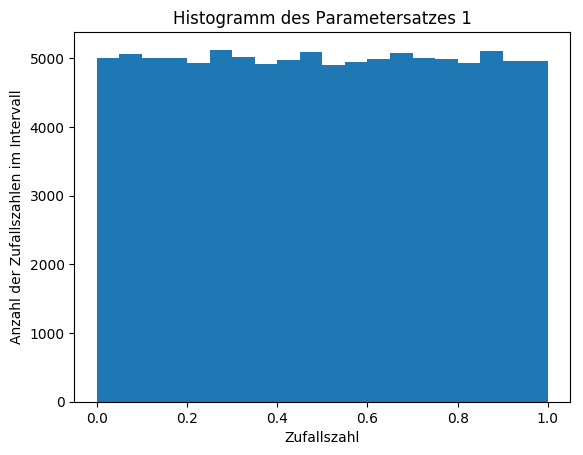

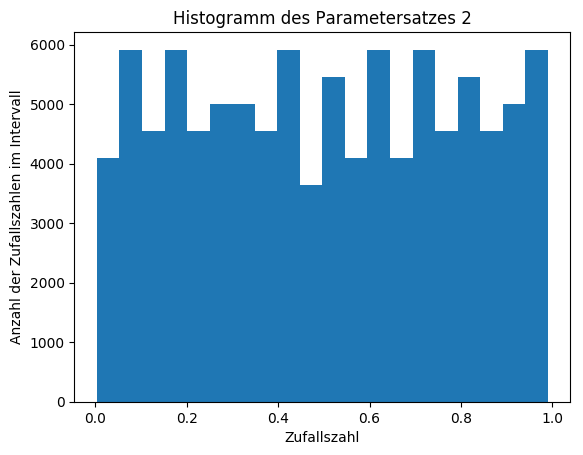

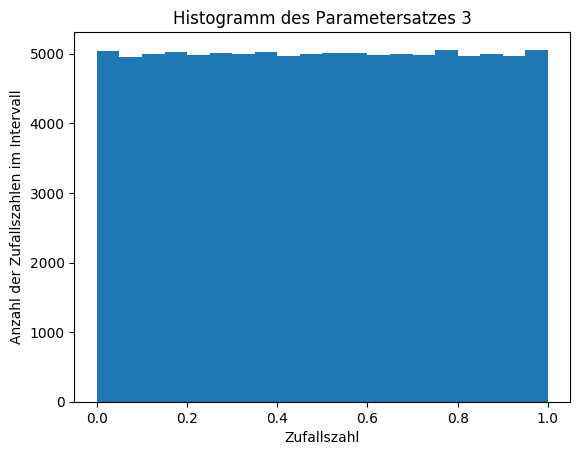

In [6]:
N = Int(1e5)
M = 20
p = Array{Int}(3)
for i in 1:3
    r = my_rand(N, u_0[i], a[i], c[i], m[i])
    figure(i)
    PyPlot.plt[:hist](r, M)
    title("Histogramm des Parametersatzes $i")
    xlabel("Zufallszahl")
    ylabel("Anzahl der Zufallszahlen im Intervall")
end
show()

### Teil e

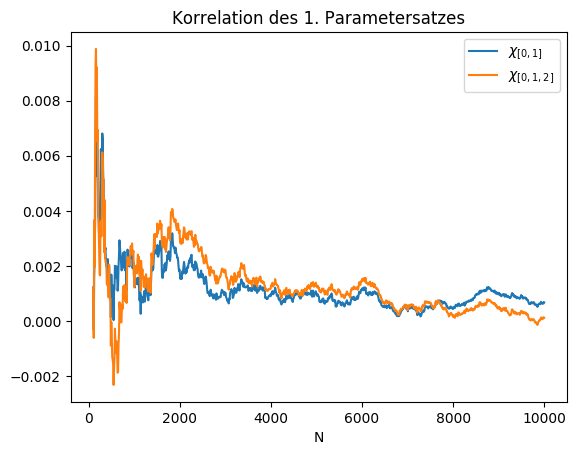

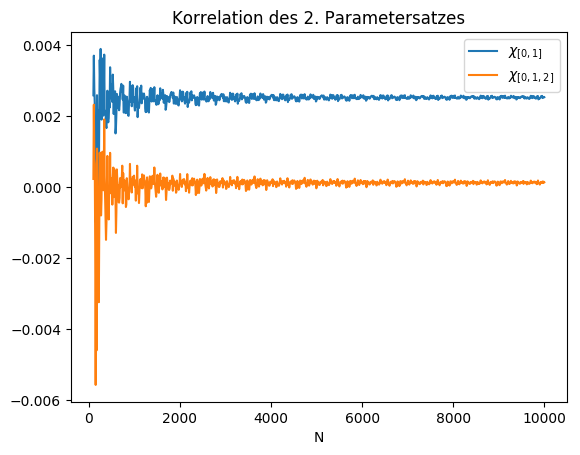

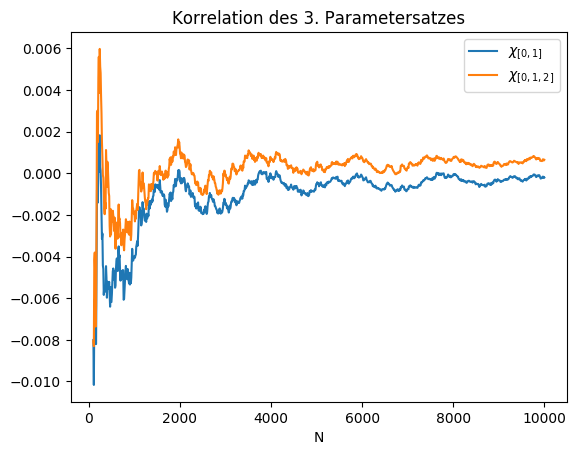

In [10]:
res = 1000
function chi(x, indices)
    N = length(x)
    N_i = length(indices)
    result = 0.
    for i in 1:N-indices[N_i]
        prod = 1.
        for j in indices
            prod *= x[i+j]
        end
        result += prod
    end
    return result/(N-indices[N_i]) - mean(x)^N_i
end
for i in 1:3
    N = Int.(round.(linspace(1e2,1e4, res)))
    cor01 = Array{Float64}(res)
    cor012 = Array{Float64}(res)
    for j in 1:length(N)
        cor01[j] = chi(my_rand(N[j], u_0[i], a[i], c[i], m[i]), [0,1])
        cor012[j] = chi(my_rand(N[j], u_0[i], a[i], c[i], m[i]), [0,1,2])
    end
    figure(i)
    plot(N, cor01, label="\$\\chi_{[0,1]}\$")
    plot(N, cor012, label="\$\\chi_{[0,1,2]}\$")
    title("Korrelation des $i. Parametersatzes")
    xlabel("N")
    legend()
end
show()

In [9]:
mean([1,2])

1.5